# HW3 code skeleton

Code for Q1-Q7.

#### % import necessary modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from numpy import diag
import scipy.stats


#### % load the data and setup some variables

data is a numpy ndarray of shape (3,41,12) for the three diseases, 41 years and 12 months

In [5]:
diseases = ['Measles', 'Mumps', 'ChickenPox']
year = np.arange(1931, 1972)
month = np.arange(1, 13)
month_str = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')


url = 'diseases.csv'
# uncomment the following to read directly from github
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/' + url
data = pd.read_csv(url,header=None).values
data = data.reshape([3, 41, 12]) #data[0], data[1], and data[2] is for measles, mumps, and chickenpox


### % Q1 calucate and show mean number of cases per year, and 95% CI of the mean

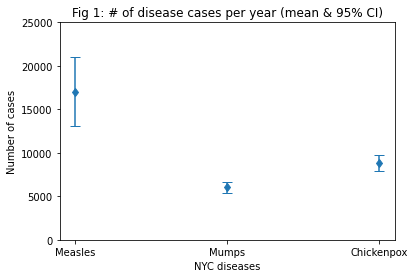

In [73]:
from logging import error
#Q1 (10 pts). Calculate the mean of the number of cases per year for each disease, and estimate
#the 95% confidence interval of the mean (Lec4-1.pptx slide #4). Plot as an errorbar. (Use
#marker='d', linestyle='', capsize=5 to show a figure similar to example Figure 1 on the next page.) 

measles = data[0]
mumps = data[1]
chickenpox = data[2]



measles_sum = np.sum(measles, axis = 1)
measles_mean = np.mean(measles_sum)

mumps_sum = np.sum(mumps, axis=1)
mumps_mean = np.mean(mumps_sum)

chickenpox_sum = np.sum(chickenpox, axis=1)
chickenpox_mean = np.mean(chickenpox_sum)


#print(measles_mean)
#print(mumps_mean)
#print(chickenpox_mean)


SEM = np.std(data,0)/sqrt(data.shape[0])
SEM_measles = np.std(measles)/sqrt(measles.shape[0])
SEM_mumps = np.std(mumps)/sqrt(mumps.shape[0])
SEM_chickenpox = np.std(chickenpox)/sqrt(chickenpox.shape[0])


plt.errorbar(['Measles','Mumps','Chickenpox'],[measles_mean, mumps_mean, chickenpox_mean], [SEM_measles*1.96*5, SEM_mumps*1.96*5, SEM_chickenpox*1.96*5]
             ,marker='d', linestyle='', capsize=5)

plt.ylim(0,25000)
plt.figure(1)
plt.ylabel("Number of cases")
plt.xlabel("NYC diseases")
plt.title('Fig 1: # of disease cases per year (mean & 95% CI)')
plt.show()

### % Q2 calucate and show percent of cases occurred in each month


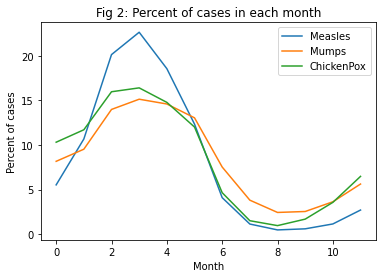

In [ ]:
#Q2 (10 pts). For each disease, calculate the fraction of cases occurred in each month of the year.
#Specifically, you will end up with a matrix C of size 3 x 12, where each row is for a disease, and
#the value in the i-th row and k-th column, Cik, is the total number of cases of disease i occurred
#in month k divided by the total number of cases of disease i. 

#Mathematically, Cik = sum_j(Dijk) /
#sum_j sum_k(Dijk). (Note: use matrix multiplication instead of for loops for this if you can.) Plot
#the vectors as three lines in one graph. (See example figure 2.)


#Need to create matrix C of size 3 x 12, where each row is one of the three diseases, and each column a month
#So each month over 41 years

#Cik = sum_j(Dijk) / sum_j sum_k(Dijk)
C_measles = sum(data[0]) / sum(sum(data[0]))
C_mumps = sum(data[1]) / sum(sum(data[1]))
C_chickenpox = sum(data[2]) / sum(sum(data[2]))

#Complete array C
C = [C_measles, C_mumps, C_chickenpox]

plt.figure(2)
plt.plot(C_measles*100)                       #To get y to be the percentage multiple by 100
plt.plot(C_mumps*100)
plt.plot(C_chickenpox*100)

plt.title('Fig 2: Percent of cases in each month')
plt.xlabel("Month")

plt.ylabel("Percent of cases")



plt.legend(diseases)
plt.show()

### % Q3 Scatter plot and correlation, mean monthly cases of Measles vs mumps

---



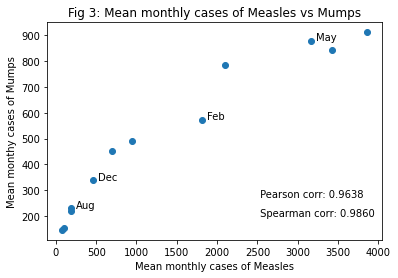

Pearson corr: 0.9638
Spearman corr: 0.9860


In [ ]:
# Q3.1 scatter plot 

#Q3.1 (8 pts) Scatter plot the mean monthly measles cases occurred in each month of the year
#against that of the mumps cases. 

#In other words, you are scatter plotting two vectors, x and y,
#each of which has 12 values. The i-th value of x represents the average number of measles cases
#per year in month i. Similarly, the i-th value of y is the average number of mumps cases pear year
#in month i. (See example figure 3.) Annotating the figure with months is optional (lecture2 slides
##27).



ind1 = 0
ind2 = 1

plt.figure(3)
plt.title('Fig 3: Mean monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))
plt.xlabel("Mean monthly cases of Measles")
plt.ylabel("Mean monthy cases of Mumps")

mean_monthly_measles = np.mean(data[0], axis = 0)
mean_monthly_mumps = np.mean(data[1], axis = 0)

plt.scatter(mean_monthly_measles, mean_monthly_mumps)

#Annotate in Aug, Dec, Feb, and May

plt.annotate('Feb', xy = (mean_monthly_measles[1], mean_monthly_mumps[1]), xytext=(5,0), textcoords='offset points')
plt.annotate('May', xy = (mean_monthly_measles[4], mean_monthly_mumps[4]), xytext=(5,0), textcoords='offset points')
plt.annotate('Aug', xy = (mean_monthly_measles[7], mean_monthly_mumps[7]), xytext=(5,0), textcoords='offset points')
plt.annotate('Dec', xy = (mean_monthly_measles[11], mean_monthly_mumps[11]), xytext=(5,0), textcoords='offset points')

# Q3.2 Pearson correlation 

#Calculate the Pearson correlation coefficient as well as the spearman correlation
#coefficient between the mean monthly measles cases and mean monthly mumps cases (the two
#vectors x and y you calculated in Q3.1), Display the values (with a precision 0.0001) in the figure
#(decide the x and y positions of display ad hoc from your figure).

mean_monthly_pearson = np.corrcoef(mean_monthly_measles, mean_monthly_mumps)[0,1]

# Q3.2 Spearman correlation coefficient 


monthly_measles_rank = np.argsort(np.argsort(mean_monthly_measles))
monthly_mumps_rank = np.argsort(np.argsort(mean_monthly_mumps))
mean_monthly_spearman = np.corrcoef(monthly_measles_rank, monthly_mumps_rank)[0,1]

plt.text(2500, 275, ' Pearson corr: %.4f' %mean_monthly_pearson)
plt.text(2500, 200, ' Spearman corr: %.4f' %mean_monthly_spearman)

plt.show()

print('Pearson corr: %.4f' %mean_monthly_pearson)
print('Spearman corr: %.4f' %mean_monthly_spearman)


### % Q4 Scatter plot and correlation, annual cases of measles vs mumps

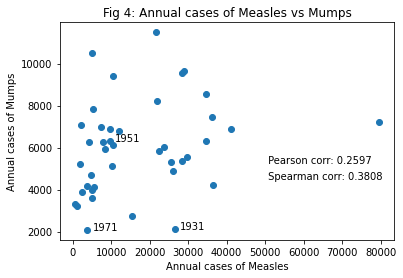

Pearson correlation: 0.2597
Spearman correlation: 0.3808 


In [ ]:
# 4.1 scatter plot 

ind1 = 0
ind2 = 1

plt.figure(4)
plt.title('Fig 4: Annual cases of %s vs %s' %(diseases[ind1], diseases[ind2]))
plt.xlabel("Annual cases of Measles")
plt.ylabel("Annual cases of Mumps")

total_annual_measles = np.sum(data[0], axis = 1)
total_annual_mumps = np.sum(data[1], axis = 1)
plt.scatter(total_annual_measles, total_annual_mumps)

plt.annotate('1931', xy = (total_annual_measles[0], total_annual_mumps[0]), xytext=(5,0), textcoords='offset points')
plt.annotate('1951', xy = (total_annual_measles[20], total_annual_mumps[20]), xytext=(5,0), textcoords='offset points')
plt.annotate('1971', xy = (total_annual_measles[40], total_annual_mumps[40]), xytext=(5,0), textcoords='offset points')

# 4.2 Pearson correlation coefficient 
total_annual_pearson = np.corrcoef(total_annual_measles, total_annual_mumps)[0,1]

# 4.3 Spearman correlation 
annual_measles_rank = np.argsort(np.argsort(total_annual_measles))
annual_mumps_rank = np.argsort(np.argsort(total_annual_mumps))
total_annual_spearman = np.corrcoef(annual_measles_rank, annual_mumps_rank)[0,1]

plt.text(50000, 5250, ' Pearson corr: %.4f' %total_annual_pearson)
plt.text(50000, 4500, ' Spearman corr: %.4f' %total_annual_spearman)

plt.show()

print('Pearson correlation: %.4f' %total_annual_pearson)
print('Spearman correlation: %.4f ' %total_annual_spearman)


### % Q5 Scatter plot and correlation, monthly cases of Measles vs mumps

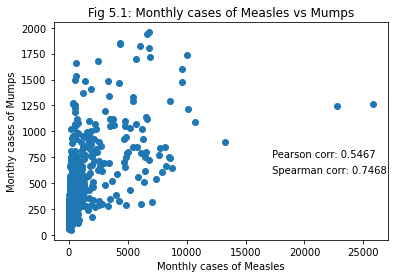

Pearson correlation in original space: 0.5467
Spearman correlation in original space: 0.7468 


In [ ]:
# 5.1 scatter plot and correlation in original space

#incorrect for some reason

plt.figure(5.1)

ind1 = 0
ind2 = 1

plt.title('Fig 5.1: Monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))
plt.xlabel("Monthly cases of Measles")
plt.ylabel("Monthy cases of Mumps")

measles = data[0].flatten()
mumps = data[1].flatten()

#print(measles)

plt.scatter(measles, mumps)

# Pearson correlation coefficient 
total_pearson = np.corrcoef(measles, mumps)[0,1]

# Spearman correlation
measles_rank = np.argsort(np.argsort(measles))
mumps_rank = np.argsort(np.argsort(mumps))
total_spearman = np.corrcoef(measles_rank, mumps_rank)[0,1]

plt.text(17000, 750, ' Pearson corr: %.4f' %total_pearson)
plt.text(17000, 600, ' Spearman corr: %.4f' %total_spearman)


plt.show()

print('Pearson correlation in original space: %.4f' %total_pearson)
print('Spearman correlation in original space: %.4f ' %total_spearman)


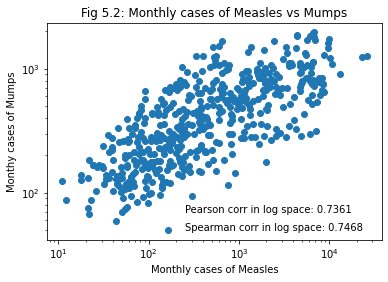

Pearson correlation in log space: 0.7361
Spearman correlation in log space: 0.7468 


In [ ]:
# 5.2 scatter plot and correlation in log space

plt.figure(5.2)

ind1 = 0
ind2 = 1

plt.title('Fig 5.2: Monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))
plt.xlabel("Monthly cases of Measles")
plt.ylabel("Monthy cases of Mumps")

measles = data[0].flatten()
mumps = data[1].flatten()
plt.scatter(measles, mumps)
plt.yscale("log")
plt.xscale("log")


# Pearson correlation coefficient 
log_pearson = np.corrcoef(np.log(measles), np.log(mumps))[0,1]

# Spearman correlation 
log_measles_rank = np.argsort(np.argsort(measles))
log_mumps_rank = np.argsort(np.argsort(mumps))
log_spearman = np.corrcoef(log_measles_rank, log_mumps_rank)[0,1]

plt.text(250, 70, 'Pearson corr in log space: %.4f' %log_pearson)
plt.text(250, 50, 'Spearman corr in log space: %.4f ' %log_spearman)

plt.show()

print('Pearson correlation in log space: %.4f' %log_pearson)
print('Spearman correlation in log space: %.4f ' %log_spearman)



### % Q6 (bonus) Correlation between number of mumps cases in different months

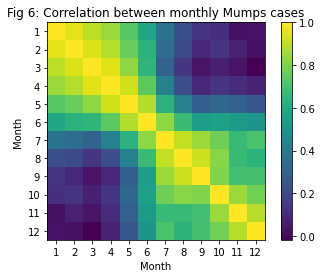

In [ ]:

mumps = data[1]


C = np.corrcoef(mumps, rowvar=False)        #We need a 12x12 matrix


# a matrix of m * p and p * n will yield m * n matrix

plt.title('Fig 6: Correlation between monthly Mumps cases')
plt.imshow(C)
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(range(12), range(1,13))
plt.yticks(range(12), range(1,13))
plt.colorbar()
plt.show()


###% Q7 (Bonus) calculate and show average perecent of diseases occurred in each month